In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-twodim-tensorprod)=
# Tensor-product discretizations

As you learned when starting double integration in vector calculus, the simplest extension of an interval to two dimensions is a rectangle. We will use a particular notation for rectangles:

:::{math}
  :label: rectangleTP
  [a,b] \times [c,d] = \bigl\{ (x,y)\in\mathbb{R}^2 : a\le x \le b,\; c\le y \le d \bigr\}.
:::

```{index} ! tensor-product domain
```
The $\times$ in this notation is called a **tensor product**, and a rectangle is the fundamental example of a **tensor-product domain**. The implication of the tensor product is that each variable independently varies over a fixed set. The simplest three-dimensional tensor-product domain is the cuboid $[a,b]\times[c,d]\times[e,f]$. When the interval is the same in each dimension (that is, the region is a square or a cube), we may write $[a,b]^2$ or $[a,b]^3$. We will limit our discussion to two dimensions henceforth.

The discretization of a two-dimensional tensor-product domain is straightforward. 

::::{proof:definition} Tensor-product grid
Given discretizations of two intervals,

:::{math}
:label: twointervals
a= x_0< x_1 < \cdots < x_m = b,  \qquad c = y_0 < y_1 < \cdots < y_n = d, 
:::

then a **tensor-product grid** on $[a,b]\times[c,d]$ is the set

:::{math}
  :label: rectangledisc
  \bigl\{ (x_i,y_j): i=0,\ldots,m,\; j=0,\ldots,n \bigr\}.
:::
::::
## Functions on grids

The double indexing of the grid set {eq}`rectangledisc` implies an irresistible connection to matrices. Corresponding to any function  $f(x,y)$ defined on the rectangle is an $(m+1)\times(n+1)$ matrix $\mathbf{F}$ defined by collecting the values of $f$ at the points in the grid. This transformation of a function to a matrix is so important that we give it a formal name: 

:::{math}
:label: fun2mtx
\mathbf{F} = \mtx(f) = \Bigl[f(x_i,y_j)\Bigr]_{\substack{i=0,\ldots,m\\j=0,\ldots,n}}.
:::

:::{caution}
There is potential for confusion because the first dimension of a matrix varies in the vertical direction, while the first coordinate $x$ varies horizontally. In fact, the Julia plotting routines we use expect the transpose of this arrangement, so that $x$ varies along columns and $y$ along rows.
:::

(example-tensorprod-smallgrid)=
::::{proof:example}
Let the interval $[0,2]$ be divided into $m=4$ equally sized pieces, and let $[1,3]$ be discretized in $n=2$ equal pieces. Then the grid in the rectangle $[0,2]\times[1,3]$ is given by all points $(i/2,1+j)$ for all choices $i=0,1,2,3,4$ and $j=0,1,2$. If $f(x,y)=\sin(\pi xy)$, then

$$
  \mtx(f) =
    \begin{bmatrix}
    \sin(\pi\cdot 0\cdot 1) & \sin(\pi\cdot0\cdot 2) & \sin(\pi\cdot0\cdot 3) \\[1mm]
    \sin\left(\pi\cdot\tfrac{1}{2} \cdot 1 \right) & \sin\left(\pi\cdot\tfrac{1}{2} \cdot 2 \right) & \sin\left(\pi\cdot\tfrac{1}{2} \cdot 3 \right) \\[1mm]
    \sin\left(\pi \cdot 1 \cdot 1 \right) & \sin\left(\pi \cdot 1 \cdot 2 \right) & \sin\left(\pi \cdot 1 \cdot 3 \right) \\[1mm]
    \sin\left(\pi\cdot \tfrac{3}{2} \cdot 1 \right) & \sin\left(\pi\cdot\tfrac{3}{2} \cdot 2 \right) & \sin\left(\pi\cdot\tfrac{3}{2} \cdot 3 \right) \\[1mm]
    \sin\left(\pi \cdot 2 \cdot 1 \right) & \sin\left(\pi \cdot 2 \cdot 2 \right) & \sin\left(\pi \cdot 2 \cdot 3 \right)
    \end{bmatrix}
    = \begin{bmatrix}
    0 & 0 & 0 \\ 1 & 0 & -1 \\ 0 & 0 & 0 \\ -1 & 0 & 1 \\ 0 & 0 & 0
    \end{bmatrix}.
$$
::::

(demo-tensorprod-gridfun)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Here is the grid from {numref}`Example {number} <example-tensorprod-smallgrid>`.

In [2]:
m = 4;   x = range(0,2,length=m+1);
n = 2;   y = range(1,3,length=n+1);

For a given $f(x,y)$ we can find $\operatorname{mtx}(f)$ by using a comprehension syntax.

In [3]:
f = (x,y) -> cos(π*x*y-y)
F = [ f(x,y) for x in x, y in y ]

5×3 Matrix{Float64}:
  0.540302  -0.416147  -0.989992
  0.841471   0.416147  -0.14112
 -0.540302  -0.416147   0.989992
 -0.841471   0.416147   0.14112
  0.540302  -0.416147  -0.989992

The plots of this section look better using a different graphics engine on the back end:

In [4]:
plotlyjs();  # use better 3D renderer

WebIO._IJuliaInit()

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
We can make a nice plot of the function by first choosing a much finer grid. However, the contour and surface plotting functions expect the *transpose* of mtx($f$).

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
To emphasize departures from a zero level, use a colormap such as `redsblues`, and use `clims` to set balanced color differences.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

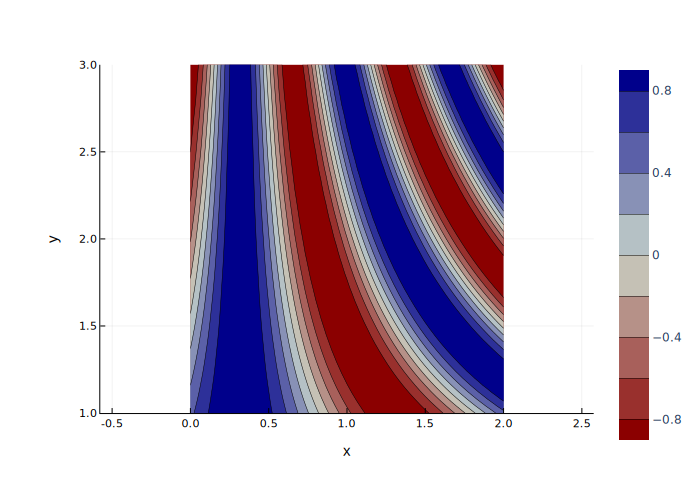

In [5]:
m = 60;   x = range(0,2,length=m+1);
n = 50;   y = range(1,3,length=n+1);
F = [ f(x,y) for x in x, y in y ];

plot(x,y,F',levels=10,fill=true,aspect_ratio=1,
    color=:redsblues,clims=(-1,1),
    xlabel="x",ylabel="y")

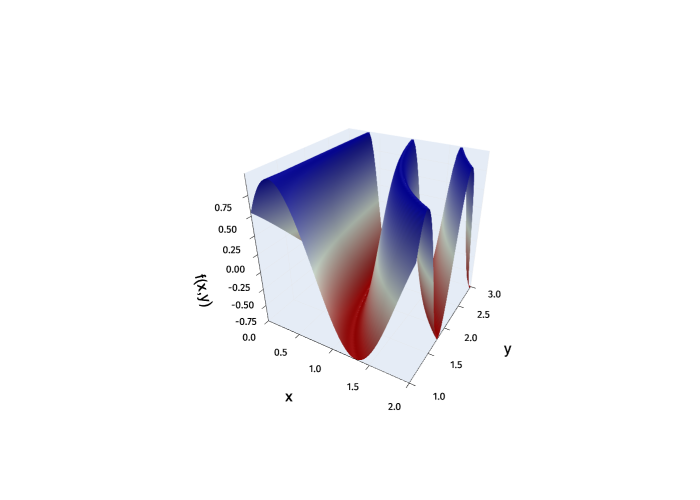

In [6]:
surface(x,y,F',l=0,leg=:none,
    color=:redsblues,clims=(-1,1),
    xlabel="x",ylabel="y",zlabel="f(x,y)")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Parameterized surfaces

We are not limited to rectangles by tensor products. Many regions and surfaces may be parameterized by means of $x(u,v)$, $y(u,v)$, and $z(u,v)$, where $u$ and $v$ lie in a rectangle. Such "logically rectangular" surfaces include the unit disk,

:::{math}
:label: unitdiskparam
\left\{
\begin{aligned}
x &= u \cos v, \\
y &= u \sin v,\\
\end{aligned}
\right.
\qquad \qquad
\left.
\begin{aligned}
0 & \le u < 1, \\
0 &\le v \le 2\pi,
\end{aligned}
\right.
:::

and the unit sphere,

:::{math}
:label: spheredomain
\left\{
\begin{aligned}
x &= \cos u \sin v,\\
y &= \sin u \sin v,\\
z &= \cos v,
\end{aligned}
\right.
\qquad \qquad
  \left.
\begin{aligned}
0 & \le u < 2\pi, \\
0 &\le v \le \pi.
\end{aligned}
\right.
:::

(demo-tensorprod-disksphere)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

For a function given in polar form, such as $f(r,\theta)=1-r^4$, construction of a function over the unit disk is straightforward using a grid in $(r,\theta)$ space.

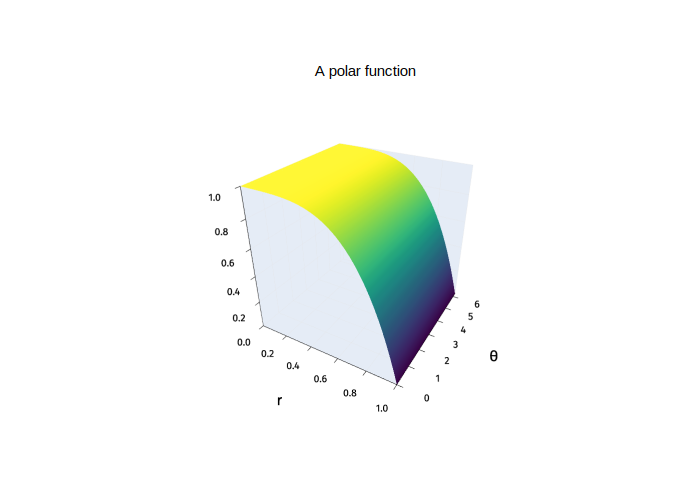

In [7]:
r = range(0,1,length=41)
θ = range(0,2π,length=81)
F = [ 1-r^4 for r in r, θ in θ ]

surface(r,θ,F',legend=:none,l=0,color=:viridis,
    xlabel="r",ylabel="θ",title="A polar function")

Of course, we are used to seeing such plots over the $(x,y)$ plane, not the $(r,\theta)$ plane. For this we create matrices for the coordinate functions $x$ and $y$.

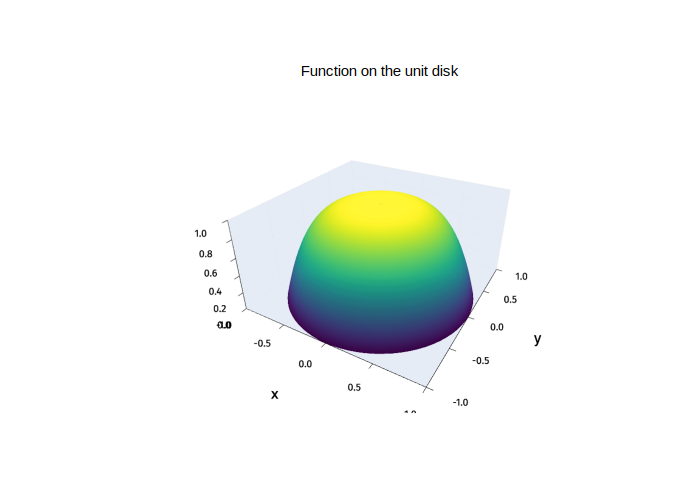

In [8]:
X = [ r*cos(θ) for r in r, θ in θ ]
Y = [ r*sin(θ) for r in r, θ in θ ]

surface(X',Y',F',legend=:none,l=0,color=:viridis,
    xlabel="x",ylabel="y",title="Function on the unit disk")

In such functions the values along the line $r=0$ must be identical, and the values on the line $\theta=0$ should be identical to those on $\theta=2\pi$. Otherwise the interpretation of the domain as the unit disk is nonsensical. If the function is defined in terms of $x$ and $y$, then those can be defined in terms of $r$ and $\theta$ using {eq}`unitdiskparam`.

On the unit sphere, we can use color to indicate a function value. Here is a plot of the function $f(x,y,z) = x y z^3$. Since we need coordinate function matrices for the plot, we also use them to evaluate $f$ on the grid.

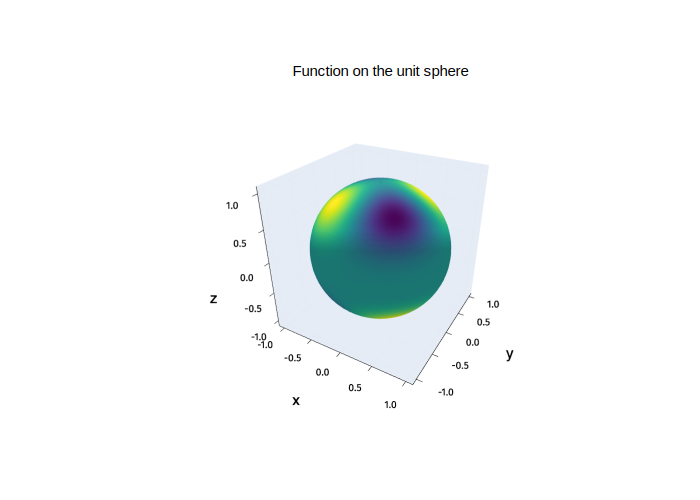

In [9]:
θ = range(0,2π,length=61)
ϕ = range(0,π,length=51)

X = [ cos(θ)*sin(ϕ) for θ in θ, ϕ in ϕ ]
Y = [ sin(θ)*sin(ϕ) for θ in θ, ϕ in ϕ ]
Z = [ cos(ϕ) for θ in θ, ϕ in ϕ ]

F =  @. X*Y*Z^3
surface(X',Y',Z',fill_z=F',l=0,leg=:none,color=:viridis,
    xlims=(-1.1,1.1),ylims=(-1.1,1.1),zlims=(-1.1,1.1),
    xlabel="x",ylabel="y",zlabel="z",
    title="Function on the unit sphere")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Partial derivatives

In order to solve boundary-value problems in one dimension by collocation, we replaced an unknown function $u(x)$ by a vector of its values at selected nodes and discretized the derivatives in the equation using differentiation matrices. We use the same ideas in the 2D case: we represent a function by its values on a grid, and multiplication by differentiation matrices to construct discrete analogs of the partial derivatives $\frac{\partial u}{\partial x}$ and $\frac{\partial u}{\partial y}$.

```{index} differentiation matrix
```
Consider first $\frac{\partial u}{\partial x}$. In the definition of this partial derivative, the independent variable $y$ is held constant. Note that $y$ is constant within each column of $\mathbf{U} = \mtx(u)$. Thus, we may regard a single column $\mathbf{u}_j$ as a discretized function of $x$ and, as usual, left-multiply by a differentiation matrix $\mathbf{D}_x$ such as {eq}`diffmat12b`. We need to do this for each column of $\mathbf{U}$ by $\mathbf{D}_x$, which is accomplished by $\mathbf{D}_x \mathbf{U}$. Altogether,

:::{math}
  :label: partfpartx
  \mtx\left( \frac{\partial u}{\partial x} \right) \approx \mathbf{D}_x \, \mtx(u).
:::

This relation is not an equality, because the left-hand side is a discretization of the exact partial derivative, while the right-hand side is a 
finite-difference approximation. Yet it is a natural analog for partial differentiation when we are given not $u(x,y)$ but only the grid value matrix $\mathbf{U}$.

Now we tackle $\frac{\partial u}{\partial y}$. Here the inactive coordinate $x$ is held fixed within each *row* of $\mathbf{U}$. However, if we transpose $\mathbf{U}$, then the roles of rows and columns are swapped, and now $y$ varies independently down each column. This is analogous to the situation for the $x$-derivative, so we left-multiply by a finite-difference matrix $\mathbf{D}_y$, and then transpose the entire result to restore the roles of $x$ and $y$ in the grid. Fortunately, linear algebra allows us to express the sequence transpose–left-multiply–transpose more compactly:

:::{math}
:label: partfparty
\mtx\left( \frac{\partial u}{\partial y} \right) \approx \Bigl(\mathbf{D}_y \mathbf{U}^T\Bigr)^T = \mtx(u)\, \mathbf{D}_y^T.
:::

Keep in mind that the differentiation matrix $\mathbf{D}_x$ is based on the discretization $x_0,\ldots,x_m$, and as such it must be $(m+1)\times (m+1)$. On the other hand, $\mathbf{D}_y$ is based on $y_0,\ldots,y_n$ and is $(n+1)\times (n+1)$. This is exactly what is needed dimensionally to make the products in {eq}`partfpartx` and {eq}`partfparty` consistent. More subtly, if the differentiation is based on equispaced grids in each variable, the value of $h$ in a formula such as {eq}`centerFD12` will be different for $\mathbf{D}_x$ and $\mathbf{D}_y$.

(demo-tensorprod-diff)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We define a function and, for reference, its two exact partial derivatives.

In [10]:
u = (x,y) -> sin(π*x*y-y);
∂u_∂x = (x,y) -> π*y*cos(πx*y-y);
∂u_∂y = (x,y) -> (π*x-1)*cos(π*x*y-y);

We use an equispaced grid and second-order finite differences as implemented by `diffmat2`.

In [11]:
m = 80;  x,Dx,_ = FNC.diffmat2(m,[0,2]);
n = 60;  y,Dy,_ = FNC.diffmat2(n,[1,3]);
mtx = (f,x,y) -> [ f(x,y) for x in x, y in y ]
U = mtx(u,x,y)
∂xU = Dx*U
∂yU = U*Dy';

Now we compare the exact $\frac{\partial u}{\partial y}$ with its finite-difference approximation.

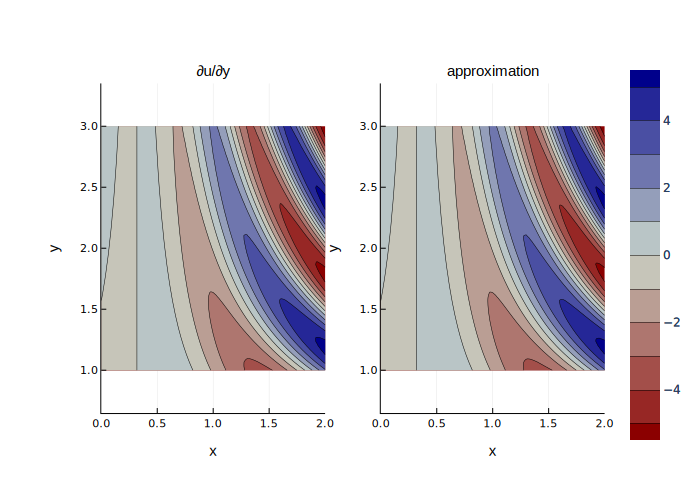

In [12]:
M = maximum(abs,∂yU)    # find the range of the result
plot(layout=(1,2),aspect_ratio=1,clims=(-M,M),xlabel="x",ylabel="y")
contour!(x,y,mtx(∂u_∂y,x,y)',layout=(1,2),levels=12,
    fill=true,color=:redsblues,title="∂u/∂y")      
contour!(x,y,∂yU',subplot=2,levels=12,
    fill=true,color=:redsblues,title="approximation")

To the eye there is little difference to be seen, though the results have no more than a few correct digits at these discretization sizes:

In [13]:
exact = mtx(∂u_∂y,x,y)
# Relative difference in Frobenius norm:
norm(exact-∂yU) / norm(exact)

0.0035544848411698023

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

(problem-tensorprod-surfcontourplot)= 
1. ⌨ In each part, make side-by-side surface and contour plots of the given function over the given domain. 

    **(a)** $f(x,y) = 2y + e^{x-y}$, $\quad[0,2]\times[-1,1]$
    
    **(b)** $f(x,y) = \tanh[5(x+xy-y^3)]$, $\quad[-2,2]\times[-1,1]$
    
    **(c)** $f(x,y) = \exp \bigl[-6(x^2+y^2-1)^2 \bigr]$, $\quad[-2,2]\times[-2,2]$


2. ⌨ For each function in [Exercise 1](problem-tensorprod-surfcontourplot), make side-by-side surface plots of $f_x$ and $f_y$ using Chebyshev spectral differentiation.

3. ⌨ For each function in [Exercise 1](problem-tensorprod-surfcontourplot), make a contour plot of the mixed derivative $f_{xy}$ using Chebyshev spectral differentiation.

4. ⌨ In each case, make a plot of the function given in polar or Cartesian coordinates over the unit disk.

    **(a)** $f(r,\theta) = r^2 - 2r\cos \theta$
    
    **(b)** $f(r,\theta) = e^{-10r^2}$
    
    **(c)** $f(x,y) = xy - 2 \sin (x)$

5. ⌨ Plot $f(x,y,z)=x y - x z - y z$ as a function on the unit sphere. 
    %(Use `aspect_ratio=1` in a plot call to get equal aspect ratios for the axes.)

6. ⌨ Plot $f(x,y,z)=x y - x z - y z$ as a function on the cylinder $r=1$ for $-1\le z \le 2$. 
    %(Use `aspect_ratio=1` in a plot call to get equal aspect ratios for the axes.)